# 클러스터 분석이란?

In [1]:
import pandas as pd

In [5]:
user_activity = pd.read_csv('data/app_users.csv', index_col =[0])
user_activity.head()

,visit_per_month,use_time
0,14,22.8
1,32,13.6
2,8,3.1
3,13,5.7
4,19,20.8


In [6]:
import seaborn as sns

In [11]:
sns.set(style='darkgrid',
       rc ={'figure.figsize':(16,9)})

C:\Users\semin\AppData\Local\Temp\ipykernel_26892\2500126404.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data= user_activity,


<Axes: xlabel='visit_per_month', ylabel='use_time'>

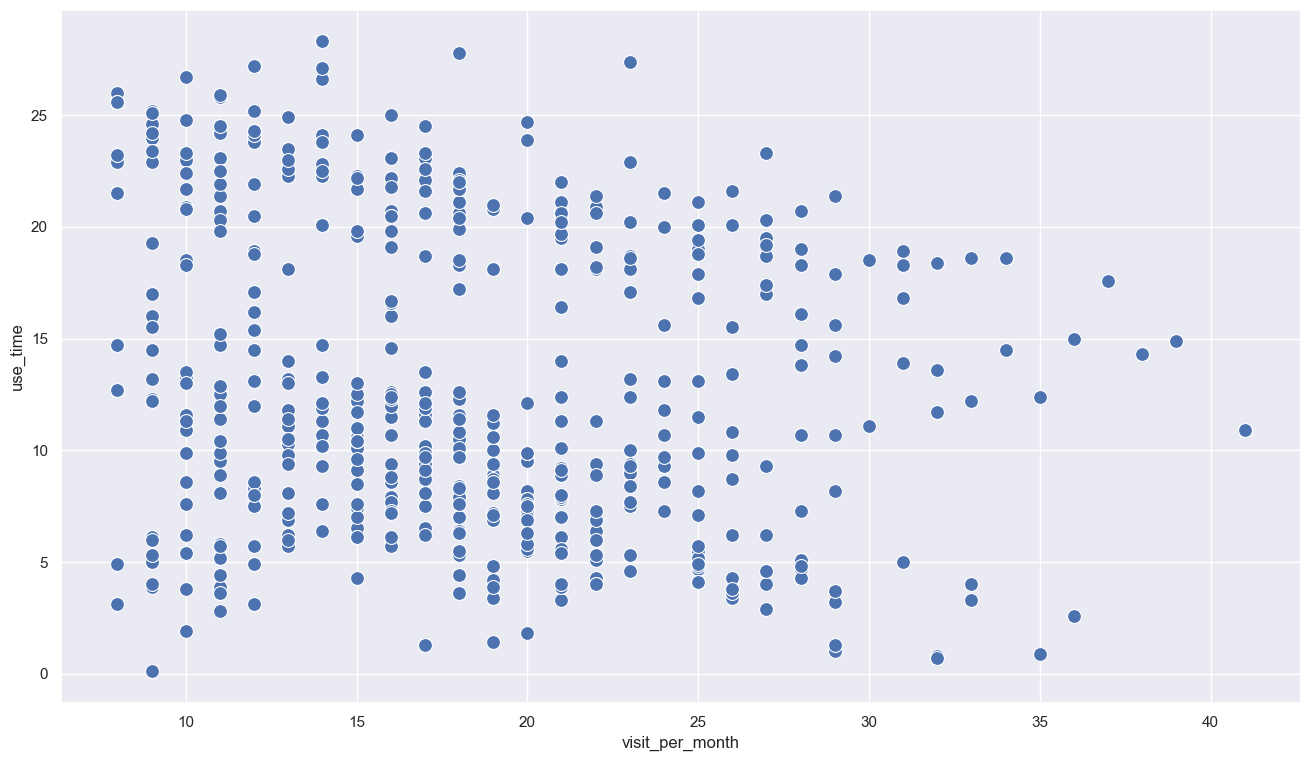

In [12]:
sns.scatterplot(data= user_activity,
                x='visit_per_month', 
                y='use_time',
               s=100,
               palette='bright') #점의 크기


# 하나의 클러스터로 묶어주기

In [14]:
from sklearn.cluster import KMeans

In [15]:
model = KMeans(n_clusters=3, random_state=123)

In [16]:
model.fit(user_activity)

#클러스터 구분
user_activity['label']= model.predict(user_activity)

#클러스터별 속한 유저 수 
user_activity.groupby('label').count()

C:\Users\semin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\semin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,visit_per_month,use_time
label,,
0,228,228
1,126,126
2,146,146


<Axes: xlabel='visit_per_month', ylabel='use_time'>

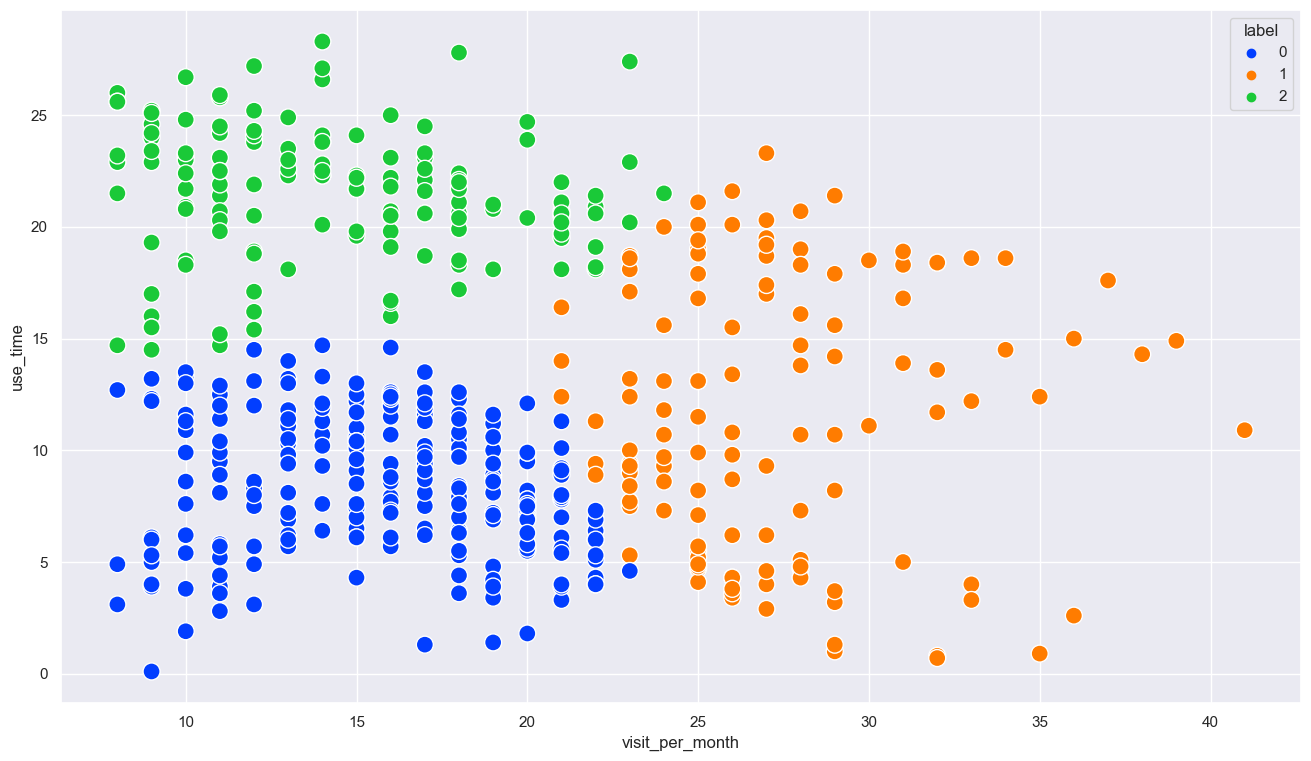

In [20]:
sns.scatterplot(data = user_activity,
               x= 'visit_per_month',
               y = 'use_time',
               hue = user_activity['label'],
                s =150,
               palette='bright')

유사한 데이터는 같으 클러스터로 묶기
거리 기반 클러스터링 기준 => k-means